In [21]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch

sys.path.append("/Users/mitchellostrow/Desktop/Projects/NN_delays/nn_delay_embeddings")
from src.models import S4, RNN, GPT, Mamba
from src.metrics import compute_dynamic_quantities
from dysts.flows import Lorenz

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


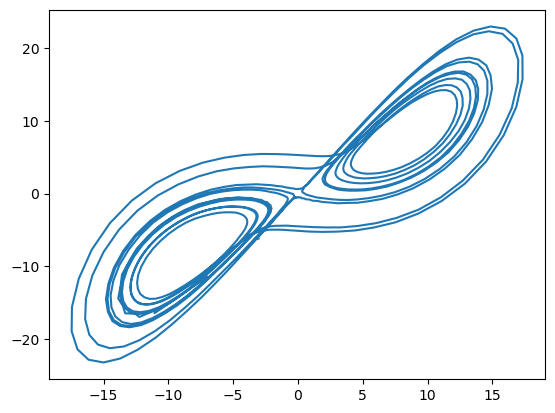

In [2]:
## Load and simulate an attractor
attractor = Lorenz()
sol = attractor.make_trajectory(1000, resample=True, noise=0.01)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

In [34]:
dim = 10
# model = RNN(1,1,'LSTM',d_model=dim,activation='tanh')
# model = S4(1,1,3,10)
# model = GPT(1,50,2,1000)
model = Mamba(1, 1, 1, 10, 10)
model.eval()

s = torch.tensor(sol[:-1, 0:1].reshape(1, -1, 1), dtype=torch.float32)
print(s.shape)
y, x = model(s)
x.shape, y.shape

torch.Size([1, 999, 1])


(torch.Size([1, 999, 1, 10]), torch.Size([1, 999, 1]))

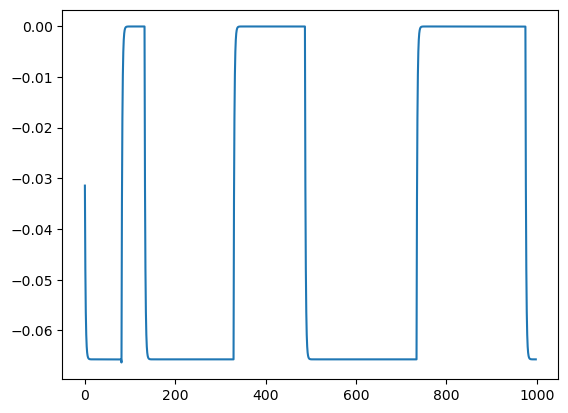

In [35]:
plt.plot(x.detach().numpy().squeeze()[:, 0])

In [36]:
sys.path.append(
    "/Users/mitchellostrow/Desktop/Projects/NN_delays/nn_delay_embeddings/notebooks/"
)
from utils import train, make_dataset

In [37]:
train_loader, val_loader, train_data, val_data = make_dataset(Lorenz, 1000, 10)
train_data.shape

(10, 1000, 3) torch.Size([10, 1000, 1])
(10, 1000, 3) torch.Size([10, 1000, 1])


(10, 1000, 3)

In [38]:
from torch.optim import AdamW
import torch.nn as nn

num_steps = 100

model, train_loss, val_loss = train(
    model, train_loader, val_loader, 50, 1e-2, AdamW, nn.MSELoss(), "cpu", num_steps
)

  0%|          | 0/50 [00:00<?, ?it/s]

In [1]:
lorenz_stats, model_stats = compute_dynamic_quantities(model, attractor, 1000, 1)

NameError: name 'compute_dynamic_quantities' is not defined